In [1]:
import pandas as pd
import numpy as np 
import json
from pprint import pprint

import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

plt.style.use('seaborn')
%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\2469479165.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [15]:
import plotly.io as pio
pio.renderers.default = "svg"

### Загрузим данные в один dataframe для удобства дальнейшей обработки

In [3]:
reg_list = ['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']
df = pd.DataFrame()

for reg in reg_list:
    
    data = pd.read_csv('data/' + reg + 'videos.csv', encoding_errors='ignore')
    data['country'] = reg
    
    with open('data/' + reg + '_category_id.json') as f:
        category_df = json.load(f)
        
    id_list = [(int(cat['id']), cat['snippet']['assignable'], cat['snippet']['title']) for cat in category_df['items']]
    
    df_from_json = pd.DataFrame(
        data = id_list,
        columns = ['category_id', 'assignable', 'category_title']
    )
    data = data.merge(df_from_json, how='left', on='category_id')
    
    df = pd.concat([df, data])
    
df = df.reset_index(drop=True)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,assignable,category_title
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,True,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,True,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,True,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,True,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,True,Music


### Проверим данные на наличие пропусков.

In [3]:
print(df.isnull().sum())

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
assignable                 2738
category_title             2738
dtype: int64


В трёх признаках имеются пропуски. В ходе проверики я выявил (из финального кода я её убрал, что бы не загромождать документ), что пропуски содержатся в одной категории и значение для данной категории уникально. Поэтому пропуски заполняем этим уникальным значением. 

In [4]:
df['category_title'] = df.groupby('category_id')['category_title'].transform(lambda x: x.fillna(x.mode()[0]))
df['assignable'] = df.groupby('category_id')['assignable'].transform(lambda x: x.fillna(x.mode()[0]))

In [5]:
df.describe(include='object').T

,count,unique,top,freq
video_id,375942,184287,#NAME?,2312
trending_date,375942,205,18.08.02,1965
title,375942,186272,Mission: Impossible - Fallout (2018) - Officia...,100
channel_title,375942,37824,The Late Show with Stephen Colbert,984
publish_time,375942,169286,2018-05-18T14:00:04.000Z,92
tags,375942,142211,[none],37698
thumbnail_link,375942,185690,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,92
description,356464,156165,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,467
country,375942,10,US,40949
category_title,375942,18,Entertainment,109006


Приведём временные признаки в формат datetime. Данное преобразование избыточное для текущего задания, но наверняка будет полезным для дальнейшей более глубокой обработки.

In [5]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

df['publish_time'] = df['publish_time'].apply(lambda x: ' '.join(x.split('T'))[:-5])
df['publish_time'] = pd.to_datetime(df['publish_time'])

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,assignable,category_title
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,True,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,True,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,True,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,True,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,True,Music


In [6]:
df['tags'] = df['tags'].apply(lambda x: x.split('|'))
df['tags'] = df['tags'].apply(lambda tag_list: [re.sub(r'"', '', tag).lower() for tag in tag_list])

df['tags'] = df['tags'].apply(lambda tag_list: np.nan if tag_list == ['[none]'] else tag_list)

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,assignable,category_title
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"[eminem, walk, on, water, aftermath/shady/inte...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,True,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"[plush, bad unboxing, unboxing, fan mail, idub...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,True,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,True,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,True,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"[edsheeran, ed sheeran, acoustic, live, cover,...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,True,Music


# Задание 1. 

### Связь между страной и популярными категориями. Правди ли, что индусы и немцы смотрят одно и тоже, а японцы прилетают с космоса?

Сгруппируем исходный датафрейм по признаку страны и категории. 

In [7]:
grouped_df = df.groupby(['country', 'category_title'])[['views', 'likes', 'dislikes', 'comment_count']].sum()
grouped_df

views      likes  dislikes  comment_count
country category_title                                                       
CA      Autos & Vehicles        200066074    4732114    197776        1016188
        Comedy                 3708438785  196046674   5372515       19638776
        Education               531773343   20972402    793448        2968416
        Entertainment         13671215509  387245433  25791583       55313036
        Film & Animation       2939060844   77802003   3111259       10086573
...                                   ...        ...       ...            ...
US      Pets & Animals          764651989   19370702    527379        2660705
        Science & Technology   3487756816   82532638   4548402       11989926
        Shows                    51501058    1082639     24508          95117
        Sports                 4404456673   98621211   5133551       11192155
        Travel & Events         343557084    4836246    340427         911511

[167 rows x 4 columns]

Преоразуем полученный датафрейм - оставим только пять наиболее популярных категорий для каждой страны. Далее при помощи графиков сможем сравнить наиболее популярные категории интересующих нас стран и ответить на поставленный вопрос.

In [8]:
def sort(df):
    return df.sort_values(by='views', ascending=False)[:5]

country_interest_df = grouped_df.groupby(level=0).apply(sort)
country_interest_df = country_interest_df.reset_index(level=0).drop('country', axis=1)
country_interest_df.reset_index(inplace=True)
country_interest_df

,country,category_title,views,likes,dislikes,comment_count
0,CA,Entertainment,13671215509,387245433,25791583,55313036
1,CA,Music,13179850194,564447530,22098190,52435252
2,CA,Comedy,3708438785,196046674,5372515,19638776
3,CA,People & Blogs,3228227926,105388564,9480796,16818201
4,CA,Sports,2997652188,59449419,3286369,7661342
5,DE,Entertainment,8102638694,267752272,22485534,36487217
6,DE,Music,5683870646,300297066,12985188,29621836
7,DE,People & Blogs,2193613268,60920058,4544157,8919200
8,DE,Sports,1938192278,37646423,2153755,4220385
9,DE,Film & Animation,1757184336,45315546,1864876,5387311


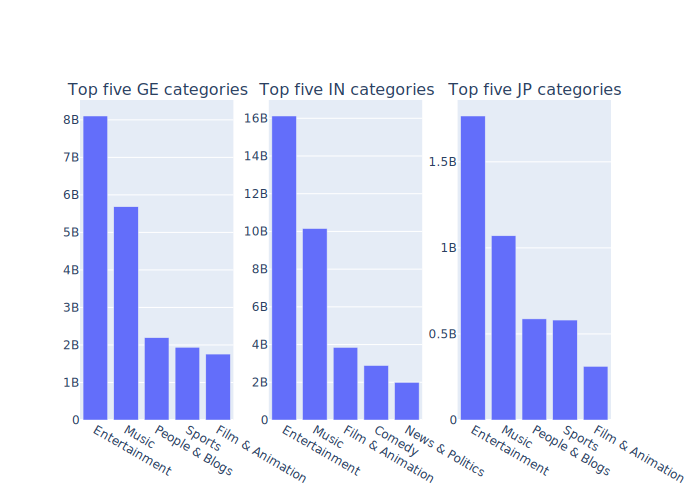

In [17]:
mask = (country_interest_df['country'] == 'DE') | (country_interest_df['country'] == 'IN') | (country_interest_df['country'] == 'JP')

bars = [px.bar(country_interest_df.loc[country_interest_df['country'] == country], x = 'category_title', y = 'views') for country in list(country_interest_df.loc[mask,'country'].value_counts().index)]

fig = make_subplots(
    rows = 1, cols = 3,
    subplot_titles = (
        'Top five GE categories', 'Top five IN categories', 'Top five JP categories'
    ))

for i in range(len(bars)):
    fig.add_trace(bars[i]['data'][0], row=1, col=i+1)
    
fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Видим, что у немцев популярностью пользуются ровно теже категории и в той же последовательности, что и у японцев. А вот индусы, помимо развлечений и музыки, предпочитают другие категории. 

# ЗАДАНИЕ 2

### Соотношение просмотров/лайков/дизлайков для разных категорий/стран. Правда ли, что мексиканцы лайкают всё подряд, а англичане чем-то неудовлетворены. А ещё мызкантам собрать лайки проще, чем политикам.

In [10]:
grouped_df['likes_ratio'] = round(grouped_df['likes'] / (grouped_df['likes'] + grouped_df['dislikes']) * 100, 2)
grouped_df['dislikes_ratio'] = round(grouped_df['dislikes'] /(grouped_df['likes'] + grouped_df['dislikes']) * 100, 2)
grouped_df.head()

views      likes  dislikes  comment_count  \
country category_title                                                      
CA      Autos & Vehicles    200066074    4732114    197776        1016188   
        Comedy             3708438785  196046674   5372515       19638776   
        Education           531773343   20972402    793448        2968416   
        Entertainment     13671215509  387245433  25791583       55313036   
        Film & Animation   2939060844   77802003   3111259       10086573   

                          likes_ratio  dislikes_ratio  
country category_title                                 
CA      Autos & Vehicles        95.99            4.01  
        Comedy                  97.33            2.67  
        Education               96.35            3.65  
        Entertainment           93.76            6.24  
        Film & Animation        96.15            3.85

In [11]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,country,category_title,views,likes,dislikes,comment_count,likes_ratio,dislikes_ratio
0,CA,Autos & Vehicles,200066074,4732114,197776,1016188,95.99,4.01
1,CA,Comedy,3708438785,196046674,5372515,19638776,97.33,2.67
2,CA,Education,531773343,20972402,793448,2968416,96.35,3.65
3,CA,Entertainment,13671215509,387245433,25791583,55313036,93.76,6.24
4,CA,Film & Animation,2939060844,77802003,3111259,10086573,96.15,3.85


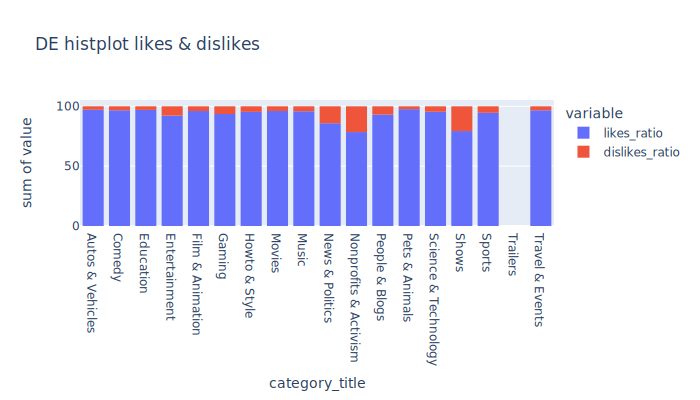

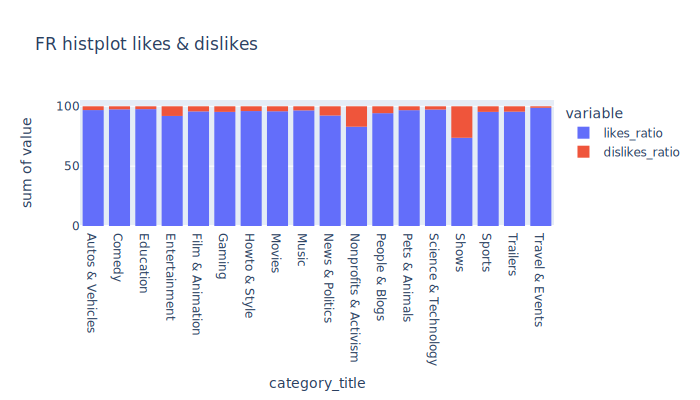

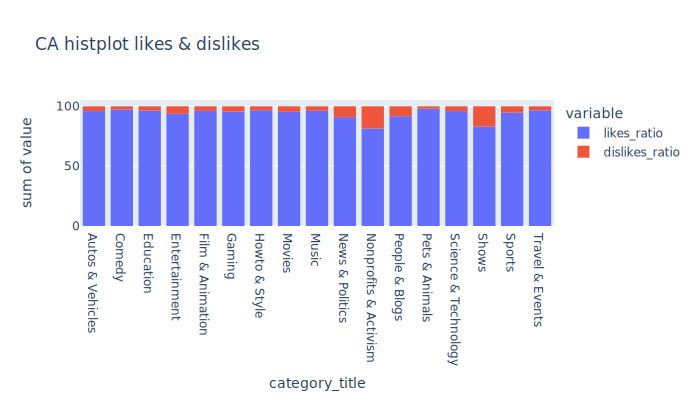

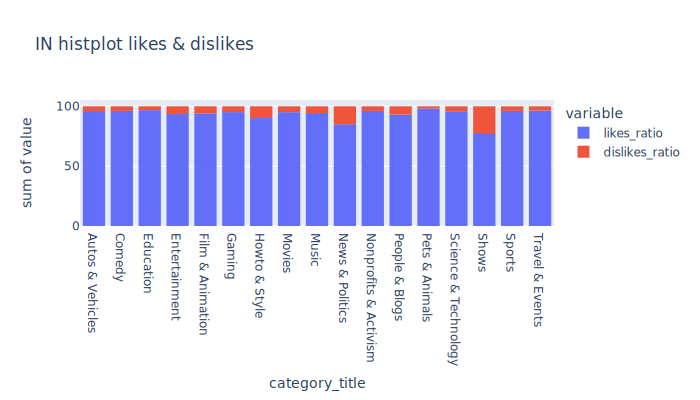

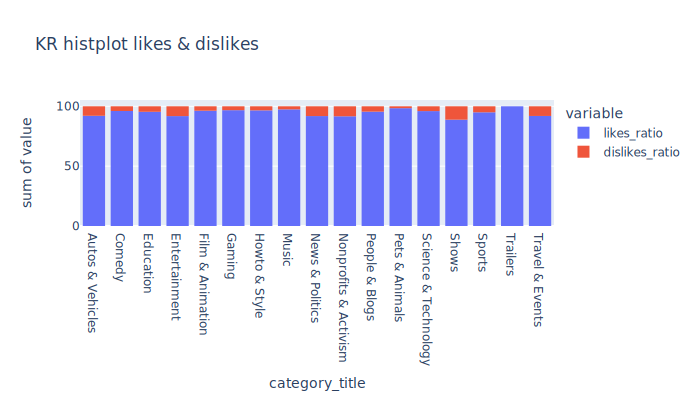

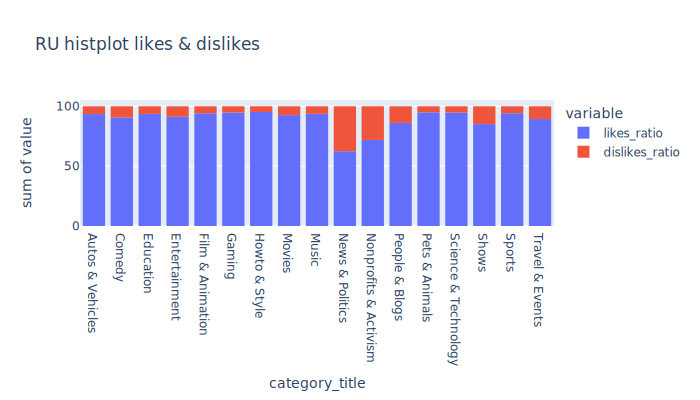

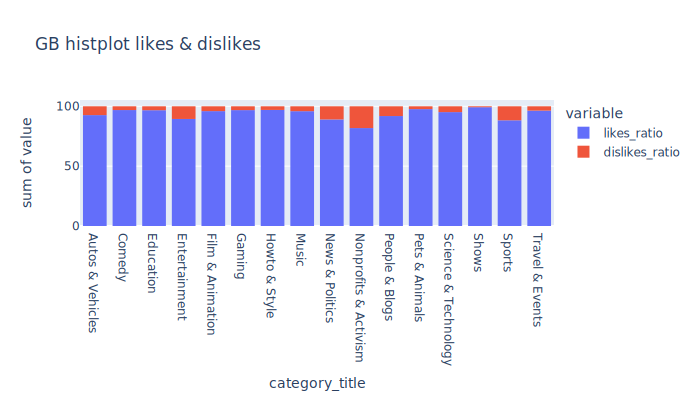

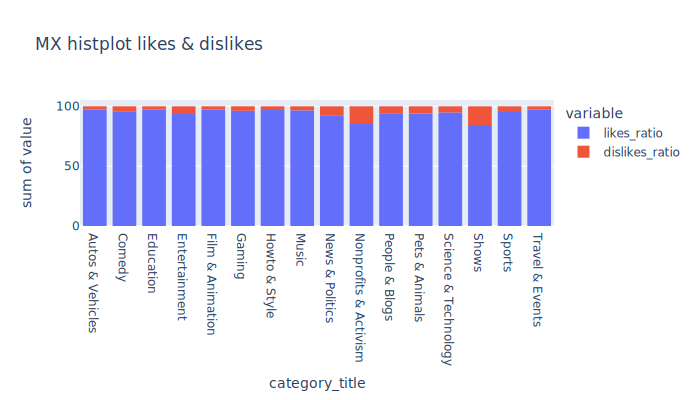

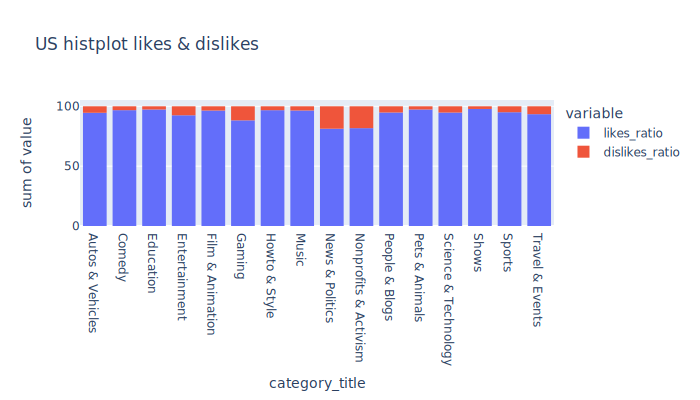

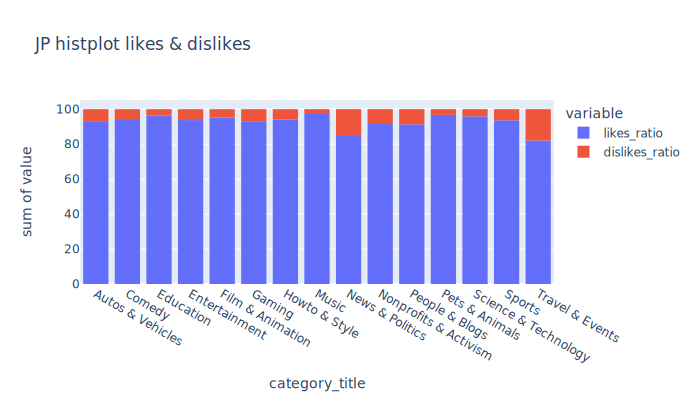

In [12]:
for country in list(grouped_df['country'].value_counts().index):
    fig = px.histogram(
        grouped_df.loc[grouped_df['country'] == country],
        x = 'category_title',
        y = ['likes_ratio', 'dislikes_ratio'],
        height = 400, width = 700,
        title = f'{country} histplot likes & dislikes'
    )
    fig.show();

In [13]:
grouped_df.groupby('country')['likes_ratio'].mean().sort_values(ascending=False)

country
KR    94.808235
MX    94.355000
FR    93.911667
CA    93.878235
GB    93.800000
IN    93.540000
US    93.463125
DE    92.997059
JP    92.965333
RU    89.330000
Name: likes_ratio, dtype: float64

In [14]:
grouped_df = grouped_df.set_index(['country', 'category_title'])

In [15]:
df.groupby('category_title')['likes'].sum().sort_values(ascending=False)

category_title
Music                    7227198427
Entertainment            2857743591
Comedy                   1081392644
People & Blogs            692550961
Film & Animation          589885590
Sports                    399630743
Howto & Style             347338295
Gaming                    298337663
Science & Technology      252570921
News & Politics           163503422
Education                 117479047
Nonprofits & Activism      93538593
Pets & Animals             56601492
Autos & Vehicles           45461895
Travel & Events            13494079
Shows                       4570827
Movies                      1005417
Trailers                        198
Name: likes, dtype: int64

In [16]:
grouped_df.reset_index()[(grouped_df.reset_index()['category_title'] == 'Music')|(grouped_df.reset_index()['category_title'] == 'News & Politics')].groupby('category_title')['likes_ratio'].mean()

category_title
Music              96.110
News & Politics    85.596
Name: likes_ratio, dtype: float64

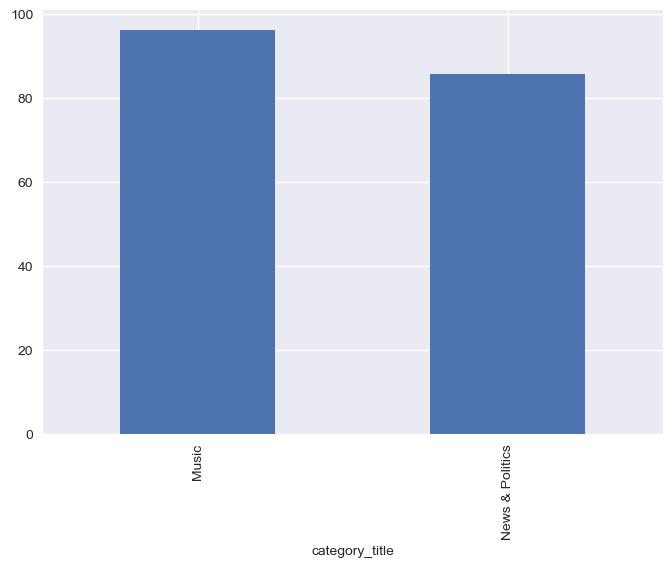

In [17]:
grouped_df.reset_index()[(grouped_df.reset_index()['category_title'] == 'Music')|(grouped_df.reset_index()['category_title'] == 'News & Politics')].groupby('category_title')['likes_ratio'].mean().plot(kind='bar');

Вывод: 
1. Мексиканцы действительно чаще других стаят лайки. Тем не менее заметно реже ставят лайки таким категориям как "Nonprofits_Activism" и "Shows". 
2. Англичане оказались не такими уж и недовольными. У англичан соотношение выставления лайков выше медианы по всем странам и составляет 93.8%. т.е. практически в 94 процентах случаев при реакции на контент, их реакция положительная. 
3. Относительно музыкантов. Да, действительно, музыкантам сильно легче получить лайк, чем политикам. Музыканты получают лайк в 96% случаях, в то время как политический контент только в 85%. Данный показатель в категории "News & Politics" является наиболее низким из всех категорий, в то время как у музыкальной категории напротив наиболее высокий.  

# ЗАДАНИЕ 3

### Каналы, которые наиболее популярны в большинстве стран.

Сгруппируем исходный датафрейм по странам и названиям каналов. В качестве значений оставим интересующие нас показы/лайки/дизлайки.

In [18]:
channel_df = df.groupby(['country', 'channel_title'])[['views', 'likes', 'dislikes']].sum()
channel_df

views    likes  dislikes
country channel_title                                       
CA      #AndresSTyle              1330191    16384       468
        #Mind Warehouse          39464664   536411     94787
        #SeekingTheTruth           119011     3277       176
        * Martyna *                 44973      524        13
        - 欢迎订阅 -浙江卫视【奔跑吧】官方频道    48769105   345378     38594
...                                   ...      ...       ...
US      ワーナー ブラザース 公式チャンネル        7389323   154962      6128
        圧倒的不審者の極み!               11417717   157447     12315
        杰威爾音樂 JVR Music         400530463  3400678    229439
        郭韋辰                         26964       99         2
        영국남자 Korean Englishman    5963784   147154      2579

[45699 rows x 3 columns]

В полученном датафрейме в разрезе стран оставим топ 100 самых популярных каналов.

In [19]:
def get_top(df):
    return df.sort_values(by='views', ascending=False)[:100]

channel_top = channel_df.groupby(level=0).apply(get_top).reset_index(level=0).drop('country', axis=1).reset_index()

Создадим уникальные множества популярных каналов во всех странах и поместим их в отдельные переменные.

In [20]:
set_ca = set(channel_top.reset_index().loc[channel_top['country'] == 'CA']['channel_title'].values)
set_de = set(channel_top.reset_index().loc[channel_top['country'] == 'DE']['channel_title'].values)
set_fr = set(channel_top.reset_index().loc[channel_top['country'] == 'FR']['channel_title'].values)
set_gb = set(channel_top.reset_index().loc[channel_top['country'] == 'GB']['channel_title'].values)
set_in = set(channel_top.reset_index().loc[channel_top['country'] == 'IN']['channel_title'].values)
set_jp = set(channel_top.reset_index().loc[channel_top['country'] == 'JP']['channel_title'].values)
set_ru = set(channel_top.reset_index().loc[channel_top['country'] == 'RU']['channel_title'].values)
set_us = set(channel_top.reset_index().loc[channel_top['country'] == 'US']['channel_title'].values)

Выберем только те каналы которые содержаться в топ 100 каналов всех стран

In [21]:
top_popular_set = set_ca & set_de & set_fr & set_gb & set_us & set_jp & set_in
top_popular_set

{'20th Century Fox',
 'Ed Sheeran',
 'Marvel Entertainment',
 'Paramount Pictures',
 'Sony Pictures Entertainment',
 'TaylorSwiftVEVO',
 'Universal Pictures',
 'Warner Bros. Pictures'}

Построим диаграмму с количеством просмотров полученных наиболее популярных каналов во всех старанах

In [22]:
df.groupby('channel_title')['views'].sum().sort_values(ascending=False).loc[list(top_popular_set)]

channel_title
Ed Sheeran                      5775405574
Marvel Entertainment           10430605449
Paramount Pictures              1868190689
Universal Pictures              3664078013
20th Century Fox                4065942047
Warner Bros. Pictures           2946162165
Sony Pictures Entertainment     4853345002
TaylorSwiftVEVO                 5606408128
Name: views, dtype: int64

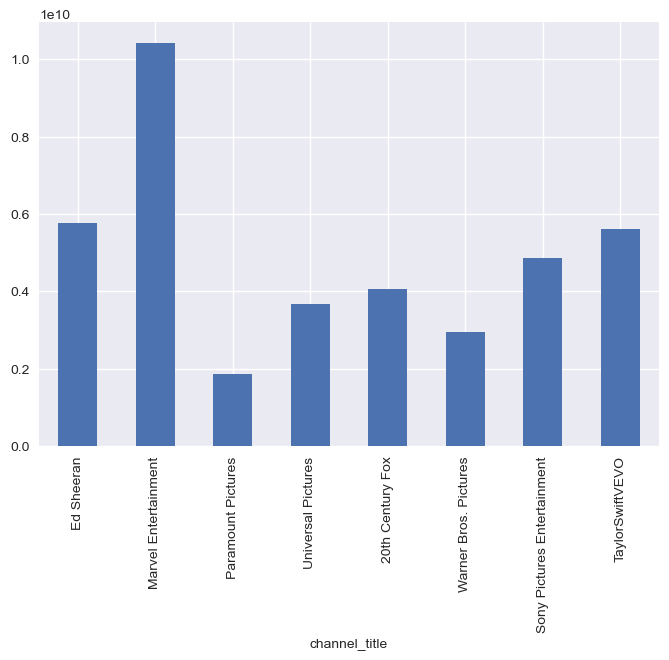

In [23]:
df.groupby('channel_title')['views'].sum().sort_values(ascending=False).loc[list(top_popular_set)].plot(kind='bar');